# Income Based Approach to Identify Underperforming Assets

When deciding to sell a single-family rental (SFR), it's crucial to identify metrics that indicate if the asset is underperforming. Why not treat SFRs like any other asset in a portfolio? So far, we've relied on a comparable sales approach to assess the 'true' value of an asset. Traditionally the income approach is reserved for commercial properties; however, since a SFR is, in essence, a revenue-generating asset considering the income approach could provide a fresh perspective on evaluating its value


I propose a new method for evaluating our SFR portfolio: 

__1. Income Approach to flag problematic assets__
<br>
- Focusing on the income generated relative to the investment, we can pinpoint properties that are not yielding expected returns.
<br>

__2. Comparable Sales Approach as a second layer of validation__
<br>
- After identifying potential properties to sell with the Income Approach, the Comparable Sales Approach should validate the market value of these properties 


In [1]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

### Adding rough estimated buy price

Ideally we know what our asset was purchased at. For the sake of example we are using GRM to estimate our purchase price. 
- Using a GRM of 7.5, we create a new column called `Estimated Price` to represent how much the property was originally purchased for

_Average GRM of 7.5 taken from Rocket Mortgage Website (https://www.rocketmortgage.com/learn/gross-rent-multiplier)_

In [2]:
train = pd.read_csv("TrainingSet.csv")
train = pd.DataFrame(train)
train['Annual Rent'] = train['Close Price'] * 12
# Use GRM to estimate property price
GRM = 7.5
train['Estimated Price'] = train['Annual Rent'] * GRM
train.head()

,Close Date,Close Price,Latitude,Longitude,Bedrooms,Bathrooms,Square Feet,Year Built,Annual Rent,Estimated Price
0,12/2/2023,4800.0,26.257621,-81.711571,4,3.0,2259,2004,57600.0,432000.0
1,12/2/2023,3700.0,34.041742,-84.044686,5,6.0,2951,2002,44400.0,333000.0
2,12/2/2023,2400.0,33.205474,-96.664503,4,2.0,1788,2000,28800.0,216000.0
3,12/2/2023,1770.0,27.756995,-82.648477,3,1.0,944,1955,21240.0,159300.0
4,12/2/2023,1995.0,32.627490,-97.328963,3,2.0,1360,2010,23940.0,179550.0


## Constants and assumptions 

A typical income approach utilizes the NOI to calculate our capitalization rate. 
<br>
Let our capitalization rate be calculated as follows

$$ \text{Capitalization Rate} = \frac{\text{NOI}}{\text{Purchase Price}} $$

While there are a number of factors that go into calculating NOI, we will make some assumptions for the sake of the example. All assumptions are explained below.

$$ \text{NOI} = \text{Rental Income} - \text{Operating Cost} $$

`Rental Income` = `Annual Rent` * (1-0.066)
- the average vacancy rate is 6.60% as per ycharts.com

`Operating Cost` = `Rental Income` * 0.40

- We will calculate `Operating Cost` at 40% as per Zillow. I will include variables like `Maintenance`, `Property Tax`, and `Insurance` for later use, but for right now we will work under this assumption.  


https://ycharts.com/indicators/us_rental_vacancy_rate

https://www.zillow.com/learn/investing-101-estimating-rental-property-expenses/#:~:text=Operating%20expenses%20percentage&text=So%20let's%20say%20you%20collect,is%20probably%20a%20good%20estimate.

In [3]:
train['Rental Income'] = train['Annual Rent']*(1-0.066)

#Example Values 
Maintenance = train['Estimated Price']*0.02
Property_Tax = train['Estimated Price']*0.015
Insurance = 2500
Misc = 1500

# train['Operating Cost'] = Maintenance + Property_Tax + Insurance + Misc
train['Operating Cost'] = train['Rental Income']*0.4

train['NOI'] = train['Rental Income'] - train['Operating Cost']


train['Capitalization Rate'] = train['NOI']/train['Estimated Price']
train.head()

,Close Date,Close Price,Latitude,Longitude,Bedrooms,Bathrooms,Square Feet,Year Built,Annual Rent,Estimated Price,Rental Income,Operating Cost,NOI,Capitalization Rate
0,12/2/2023,4800.0,26.257621,-81.711571,4,3.0,2259,2004,57600.0,432000.0,53798.40,21519.360,32279.040,0.07472
1,12/2/2023,3700.0,34.041742,-84.044686,5,6.0,2951,2002,44400.0,333000.0,41469.60,16587.840,24881.760,0.07472
2,12/2/2023,2400.0,33.205474,-96.664503,4,2.0,1788,2000,28800.0,216000.0,26899.20,10759.680,16139.520,0.07472
3,12/2/2023,1770.0,27.756995,-82.648477,3,1.0,944,1955,21240.0,159300.0,19838.16,7935.264,11902.896,0.07472
4,12/2/2023,1995.0,32.627490,-97.328963,3,2.0,1360,2010,23940.0,179550.0,22359.96,8943.984,13415.976,0.07472


## Case Study: Identifying underperforming asset

Prior we used a 40% as a mean value given by Zillow. More research indicates that `Operating Cost` can lie anywhere between 30%-70% for residential assets. While of course we can't extrapolate these values given the training data, this would be something that would ideally be provided by FirstKey Mortgage in Atlanta. For now we will use a random variable between 0.3 - 0.7 to determine `Operating Cost`. 

In [4]:
import random
# Set the seed for reproducibility
np.random.seed(69)

# Generate a random number between 0.3 and 0.7 for each row in the DataFrame
random_numbers = np.random.uniform(0.3, 0.7, size=len(train))

train['Operating Cost'] = train['Rental Income']*random_numbers

train['NOI'] = train['Rental Income'] - train['Operating Cost']


train['Capitalization Rate'] = train['NOI']/train['Estimated Price']
train.head()
#print(train['Capitalization Rate'])

,Close Date,Close Price,Latitude,Longitude,Bedrooms,Bathrooms,Square Feet,Year Built,Annual Rent,Estimated Price,Rental Income,Operating Cost,NOI,Capitalization Rate
0,12/2/2023,4800.0,26.257621,-81.711571,4,3.0,2259,2004,57600.0,432000.0,53798.40,22514.612360,31283.787640,0.072416
1,12/2/2023,3700.0,34.041742,-84.044686,5,6.0,2951,2002,44400.0,333000.0,41469.60,25861.565817,15608.034183,0.046871
2,12/2/2023,2400.0,33.205474,-96.664503,4,2.0,1788,2000,28800.0,216000.0,26899.20,11838.365091,15060.834909,0.069726
3,12/2/2023,1770.0,27.756995,-82.648477,3,1.0,944,1955,21240.0,159300.0,19838.16,12215.618854,7622.541146,0.047850
4,12/2/2023,1995.0,32.627490,-97.328963,3,2.0,1360,2010,23940.0,179550.0,22359.96,11728.684258,10631.275742,0.059211


/Users/brianyoung/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brianyoung/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


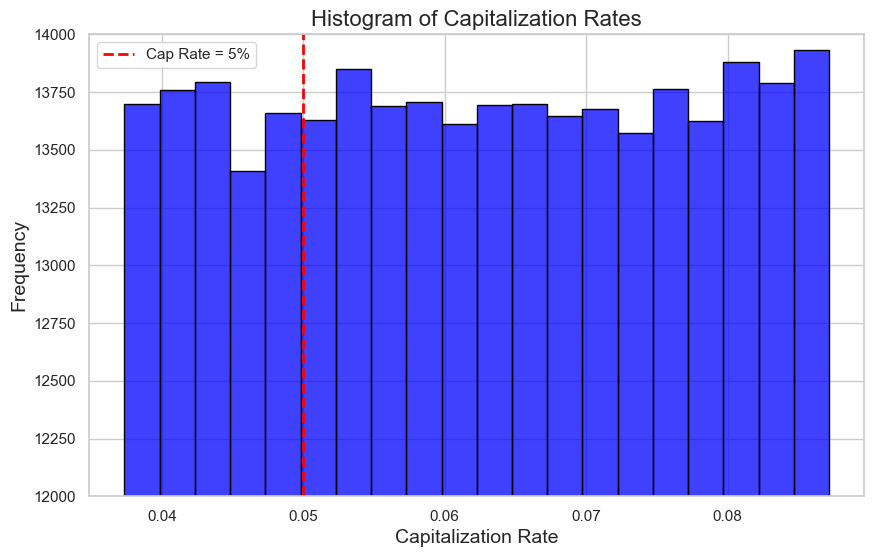

In [5]:
sns.set(style='whitegrid')

# Create the histogram
plt.figure(figsize=(10, 6))  # Set the figure size
ax = sns.histplot(train['Capitalization Rate'], kde=False, color='blue', bins=20, edgecolor='black')

# Adding a red line at cap rate = 0.05
plt.axvline(x=0.05, color='red', linestyle='--', linewidth=2, label='Cap Rate = 5%')

# Adding titles and labels
plt.title('Histogram of Capitalization Rates', fontsize=16)
plt.xlabel('Capitalization Rate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.ylim(12000, 14000)
plt.legend()
plt.show()


### Underperforming assets identified!!

Research has led me to understand that there is no definitive "bad" cap rate, it's to my understanding that we would determine this on a case by case basis. For the case study, I have taken the liberty of assuming that any asset with a cap rate below 5% is an underperforming asset. 

The next steps would be to perform a comp analysis on all properties left of the red dotted line in our histogram. A comp analysis would verify whether a property is actually underperforming in relation to similar properties in a similar area. 



https://www.baselane.com/resources/cap-rates-explained-a-comprehensive-guide-for-real-estate-investors/

# Conclusion 

The Income Approach allows us to identify underperforming assets by focusing on revenue generation rather than solely relying on a comparable sales approach. Although the Comparable Sales Approach provides an essential layer of validation, building an accurate model using this method can be challenging as discussed prior. This new perspective offered by the Income Approach may reveal insights that were previously overlooked.

As for next steps, I'd want to refine the Comparable Sales Approach to enhance its accuracy as a second-step validation tool. By narrowing the geographic area used for comparisons—implementing a more defined geofence—it can tailor the model more closely to our specific needs. This adjustment should provide a clearer picture of whether an asset is truly underperforming relative to similar properties in its vicinity.


